# Web-scraping: сбор данных из баз данных и интернет-источников

*Алла Тамбовцева*

## Практикум 2.1. Парсинг с `BeautifulSoup`: тэги и атрибуты

Мы уже немного познакомились со структурой html-страниц и поиском информации по тэгам, теперь попробуем выгрузить информацию из более интересной страницы, а точнее, с сайта [nplus1.ru](https://nplus1.ru/). Наша задача – выгрузить недавние новости в датафрейм `pandas`, чтобы потом сохранить все в файл Excel.

Для работы нам снова понадобится модуль `requests` для отправки запросов, для «подключения» к странице и получения ее содержимого в виде строки, и функция `BeautifulSoup` из библиотеки `bs4` для удобного поиска по полученной строке:

In [1]:
import requests
from bs4 import BeautifulSoup

Сохраним ссылку на главную страницу в переменную `main` и отправим запрос к ней с помощью функции `get()` из `requests`:

In [2]:
main = "https://nplus1.ru/"
page = requests.get(main)

Заберём исходный код страницы и преобразуем строку с ним в объект `BeautifulSoup`:

In [3]:
soup = BeautifulSoup(page.text)

Чтобы сгрузить все новости с главной страницы сайта, нужно собрать все ссылки на страницы с этими новостями. Ссылки в html-файле всегда заключены в тэг `<a></a>` и имеют атрибут `href`. Найдем кусочки кода HTML, соответствующие всем ссылкам на главной странице сайта:

In [4]:
links_raw = soup.find_all("a")
links_raw[10:20]  # несколько штук для примера

[<a class="hover:underline transition-colors duration-75" href="https://nplus1.ru/search?tags=880">Астрономия</a>,
 <a class="hover:underline transition-colors duration-75" href="https://nplus1.ru/search?tags=768">Генетика</a>,
 <a class="hover:underline transition-colors duration-75" href="https://nplus1.ru/search?tags=890">Математика</a>,
 <a class="hover:underline transition-colors duration-75" href="https://nplus1.ru/search?tags=871">Космонавтика</a>,
 <a class="hover:underline transition-colors duration-75" href="https://nplus1.ru/search?tags=876">Археология</a>,
 <a class="hover:underline transition-colors duration-75" href="https://nplus1.ru/search?tags=775">Нейронауки</a>,
 <a class="hover:underline transition-colors duration-75" href="https://nplus1.ru/search?tags=767">На мышах</a>,
 <a class="hover:underline transition-colors duration-75" href="https://nplus1.ru/search?tags=771">Звук</a>,
 <a class="hover:underline transition-colors duration-75" href="https://nplus1.ru/search

Каждый элемент возвращаемого списка имеет тип `BeautifulSoup` и структуру, очень похожую на словарь. Например, ссылка `<a class="hover:underline transition-colors duration-75" href="/search/empty/768">Генетика</a>` изнутри выглядит как словарь следующего вида (текст ссылки, слово `Генетика` в этот словарь не входит, это отдельный «слой»):

    {'href' : '/search/empty/768', 
     'class' : 'hover:underline transition-colors duration-75'}.
    
Как мы помним, значение по ключу из словаря можно вызвать с помощью метода `.get()`. Давайте извлечем значения по ключу `href` из каждого элемента списка `links`:

In [5]:
links = [li.get("href") for li in links_raw] 
links[10:20]  # несколько штук для примера

['https://nplus1.ru/search?tags=880',
 'https://nplus1.ru/search?tags=768',
 'https://nplus1.ru/search?tags=890',
 'https://nplus1.ru/search?tags=871',
 'https://nplus1.ru/search?tags=876',
 'https://nplus1.ru/search?tags=775',
 'https://nplus1.ru/search?tags=767',
 'https://nplus1.ru/search?tags=771',
 'https://nplus1.ru/search?tags=772',
 'https://nplus1.ru/search?tags=778']

Ссылок в списке выше много. Но нам нужны только новости – ссылки, которые начинаются с `https://nplus1.ru/news`. Создадим пустой список `news` и будем добавлять в него только ссылки, которые удовлетворяют этому условию.

In [6]:
news = []
for li in links:
    if "https://nplus1.ru/news/" in li:
        news.append(li)

In [7]:
news[0:10]

['https://nplus1.ru/news/2025/01/27/palaeolithic-hand-stencils',
 'https://nplus1.ru/news/2025/01/29/divorce-little-penguins',
 'https://nplus1.ru/news/2025/01/29/miniature-gold-box-lock',
 'https://nplus1.ru/news/2025/01/29/enigmatic-burial-from-ecuador',
 'https://nplus1.ru/news/2025/01/29/lynx-deeprobotics-can-flex',
 'https://nplus1.ru/news/2025/01/29/control-the-pressure',
 'https://nplus1.ru/news/2025/01/29/jays-and-tools',
 'https://nplus1.ru/news/2025/01/28/16-legs-of-justice',
 'https://nplus1.ru/news/2025/01/28/pre-planetary-pebbles',
 'https://nplus1.ru/news/2025/01/28/more-400-gold-and-silver-coins']

Теперь наша задача сводится к следующему: изучить одну страницу с новостью, научиться из нее вытаскивать текст и всю необходимую информацию, а потом применить весь набор действий к каждой ссылке из `news` в цикле. Посмотрим на новость с индексом 0, у вас может быть другая, новости обновляются.

In [8]:
link0 = news[0]
print(link0)

https://nplus1.ru/news/2025/01/27/palaeolithic-hand-stencils


### Задача 1

Отправьте запрос к странице по ссылке `link0` с одной новостью, получите результат в виде объекта `BeautifulSoup` и сохраните его как `soup0`.

In [9]:
page0 = requests.get(link0)
soup0 = BeautifulSoup(page0.text)

### Задача 2

Найдите заголовок новости и сохраните его в переменную `title`.

In [10]:
# в исходном коде \xa0 выглядит как &nbsp
# это неразрывный пробел

title = soup0.find("title").text.replace("\xa0", " ")
title

'Кроманьонские дети отпечатали ладони на стенах пещер. Примерно 15 процентов проанализированных изображений из Испании создали дети до 12 лет'

### Задача 3

Найдите имя автора новости и дату её публикации. Сохраните их в `author` и `date` соответственно.

In [11]:
author = soup0.find("meta", {"name" : "author"}).get("content")
print(author)

Михаил Подрезов


In [12]:
date = soup0.find("meta", {"itemprop" : "datePublished"}).get("content")
print(date)

2025-01-27


### Задача 4

Найдите сложность новости и рубрики, к которым она относится. Сохраните сложность в переменную `diffc`. Рубрики сначала можно сохранить в список, а затем его элементы объединить в одну строку `rubs`.

**Подсказка:** чтобы упростить себе жизнь, найдите сначала раздел (`div`), в котором на странице хранится дата и время публикации, сложность и рубрики, а затем выполняйте поиск в рамках этого раздела.

In [13]:
# можно по той же схеме – soup0.find("div", {"class" : ""})
# но так как здесь class, можно и через class_

div = soup0.find("div", class_ = "flex flex-wrap lg:mb-10 gap-2 text-tags xl:pr-9")
print(div)

<div class="flex flex-wrap lg:mb-10 gap-2 text-tags xl:pr-9">
<span class="relative before:block before:w-px before:bg-current before:h-4 before:absolute before:left-0 group pl-2 flex inline-flex items-center">
<span class="group-hover:text-main transition-colors duration-75">11:32</span>
</span>
<a class="relative before:block before:w-px before:bg-current before:h-4 before:absolute before:left-0 group pl-2 flex inline-flex items-center" href="/news/2025/01/27">
<span class="group-hover:text-main transition-colors duration-75">27.01.25</span>
</a>
<a class="relative before:block before:w-px before:bg-current before:h-4 before:absolute before:left-0 group pl-2 flex inline-flex items-center" href="/material/difficulty/3">
<svg class="w-4 h-4 mr-1 group-hover:text-main transition-colors duration-75 stroke-current">
<use xlink:href="#n1_star"></use>
</svg>
<span class="group-hover:text-main transition-colors duration-75">3.3</span>
</a>
<a class="relative before:block before:w-px before:b

In [14]:
# находим внутри этого фрагмента все кусочки с тэгом <span>
# выбираем четвертый – с индексом 3, оттуда извлекаем текст

diffc = div.find_all("span")[3].text
print(diffc)

3.3


In [15]:
# та же история, забираем все элементы после сложности
# с 4 и до конца списка с элементами <span>,
# поскольку рубрик может быть больше одной, сколько – неизвестно

rubs_raw = div.find_all("span")[4:]
print(rubs_raw)

[<span class="group-hover:text-main transition-colors duration-75">Антропология</span>, <span class="group-hover:text-main transition-colors duration-75">Археология</span>]


In [16]:
# извлекаем текст из каждого фрагмента в списке выше

rubs_str = [r.text for r in rubs_raw]
print(rubs_str)

['Антропология', 'Археология']


In [17]:
# склеиваем через .join() в одну строку,
# чтобы после выгрузки с таблицу не было ячеек с неудобными списками

rubs = ", ".join(rubs_str)
print(rubs)

Антропология, Археология


### Задача 5

Соберите из абзацев текст новости и сохраните его в переменную `text`. Избавьтесь от постронних символов (`\xa0`, `\n`) в тексте. 

In [18]:
# чтобы не забрать абзацы с текстом следующей новости,
# сначала находим раздел только с первой новостью

col = soup0.find("div", class_ = "flex flex-col")
print(col)

<div class="flex flex-col">
<h1 class="text-34 md:text-42 xl:text-52 break-words">
            Кроманьонские дети отпечатали ладони на стенах пещер
          </h1>
<p class="text-36 md:text-44 xl:text-54 font-spectral text-main-gray mb-6">Примерно 15 процентов проанализированных изображений из Испании создали дети до 12 лет</p>
<div class="text-14 mb-5 sm:mb-12 flex flex-wrap">
<span class="whitespace-nowrap">
<a class="underline" href="/author/mixail-podrezov">Михаил Подрезов</a>
</span>
</div>
<div class="mb-14" data-lmb-0="">
<basegallerymain :gid="74142"></basegallerymain>
<div></div>
<div class="n1_material text-18"><p class="mb-6">Испанские ученые проанализировали 124 отпечатка рук из восьми пещер с палеолитическим искусством, расположенных на Пиренейском полуострове. Они определили, что примерно 15 процентов красочных следов на стенах создали дети до 12 лет, а оставшуюся часть — подростки и взрослые, причем в исследованной выборке примерно в два раза чаще встречались ладони мужч

In [19]:
# находим в этом разделе все абзацы с классом mb-6,
# из каждого абзаца забираем текст,
# склеиваем все в одну строку и после заменяем неразрывный пробел

pars_raw = col.find_all("p", class_ = "mb-6")
pars = [p.text for p in pars_raw] 
text = " ".join(pars).replace("\xa0", " ")
print(text)

Примерно 15 процентов проанализированных изображений из Испании создали дети до 12 лет Испанские ученые проанализировали 124 отпечатка рук из восьми пещер с палеолитическим искусством, расположенных на Пиренейском полуострове. Они определили, что примерно 15 процентов красочных следов на стенах создали дети до 12 лет, а оставшуюся часть — подростки и взрослые, причем в исследованной выборке примерно в два раза чаще встречались ладони мужчин, чем женщин. Об этом ученые пишут в Journal of Archaeological Method and Theory. Не позднее 50–40 тысяч лет назад появилась одна из самых ярких форм палеолитического искусства — пещерные росписи, древнейшие примеры которых сегодня известны из Юго-Восточной Азии и Европы. В сотнях пещер и на скалах, расположенных под открытым небом, с XIX века исследователи обнаружили множество различных типов изображений, включая сцены охоты, фигуры животных, антропоморфные фигуры и абстрактные символы и знаки. Популярным типом изображений на таких памятниках выступ

### Задача 6

Напишите функцию `get_news()`, которая принимает на вход ссылку на страницу с одной новостью, а возвращает список из следующих характеристик: заголовок, имя автора, дата публикации, сложность новости, рубрики, текст новости.

In [20]:
def get_news(link0):
    page0 = requests.get(link0)
    soup0 = BeautifulSoup(page0.text)
    title = soup0.find("title").text.replace("\xa0", " ")
    author = soup0.find("meta", 
                    {"name" : "author"}).get("content")
    date = soup0.find("meta", 
           {"itemprop" : "datePublished"}).get("content")
    div = soup0.find("div", 
           class_ = "flex flex-wrap lg:mb-10 gap-2 text-tags xl:pr-9")
    diffc = div.find_all("span")[3].text
    rubs_raw = div.find_all("span")[4:]
    rubs_str = [r.text for r in rubs_raw] 
    rubs = ", ".join(rubs_str)
    col = soup0.find("div", class_ = "flex flex-col")
    pars_raw = col.find_all("p", class_ = "mb-6")
    pars = [p.text for p in pars_raw] 
    text = " ".join(pars).replace("\xa0", " ")
    return [title, author, date, diffc, rubs, text]

In [21]:
# проверяем на другой новости из списка ссылок

get_news(news[2])

['В Германии обнаружили часть миниатюрного римского золотого замка. Артефакт относится, видимо, к III или IV веку нашей эры',
 'Михаил Подрезов',
 '2025-01-29',
 '1.1',
 'Археология',
 'Артефакт относится, видимо, к III или IV веку нашей эры В немецком Мюнстере представили необычный артефакт римского времени, который в 2023 году обнаружил лицензированный поисковик древностей Константин Фрид (Constantin Fried). В поле у городка Петерсхаген, который находится на севере земли Северный Рейн-Вестфалия, он нашел миниатюрную часть замка для ларца (или другого подобного предмета), которую в III–IV веках нашей эры изготовили из золота. С помощью нейтронной томографии исследователи разобрались, как, вероятно, первоначально выглядел и функционировал этот замок, а затем изготовили его латунную копию в масштабе 4:1. Как сообщается в пресс-релизе, посвященном этой находке, до сих пор не очень понятно, как мог быть изготовлен найденный артефакт без современных инструментов, учитывая, что его размер с

Отлично! Теперь осталось применить функцию ко всем ссылкам в списке `news`. Чтобы сайт не понял, что мы его автоматически грабим, будем выгружать новости постепенно – с задержкой в 1.5 секунды. Импортируем для этого функцию `sleep` :

In [22]:
from time import sleep

Теперь будем применять функцию в цикле к каждой ссылке в `news`, только с одним дополнением – добавленной конструкцией `try-except`, которая позволит продолжать исполнение цикла, если при применении функции Python столкнулся с ошибкой любого вида:

In [23]:
info = []
for n in news:
    # пробуй исполнить следующий код
    try:
        res = get_news(n)
        info.append(res)
        print(n)
    # если он вызвал ошибку, печатай сообщение и иди дальше
    except:
        print("Something went wrong")
        print(n)
    sleep(1.5)

https://nplus1.ru/news/2025/01/27/palaeolithic-hand-stencils
https://nplus1.ru/news/2025/01/29/divorce-little-penguins
https://nplus1.ru/news/2025/01/29/miniature-gold-box-lock
https://nplus1.ru/news/2025/01/29/enigmatic-burial-from-ecuador
https://nplus1.ru/news/2025/01/29/lynx-deeprobotics-can-flex
https://nplus1.ru/news/2025/01/29/control-the-pressure
https://nplus1.ru/news/2025/01/29/jays-and-tools
https://nplus1.ru/news/2025/01/28/16-legs-of-justice
https://nplus1.ru/news/2025/01/28/pre-planetary-pebbles
https://nplus1.ru/news/2025/01/28/more-400-gold-and-silver-coins
https://nplus1.ru/news/2025/01/28/glp-1ra-175-risks
https://nplus1.ru/news/2025/01/28/autozooms
https://nplus1.ru/news/2025/01/28/helical-trilayer-graphene
https://nplus1.ru/news/2025/01/27/costs-of-dominance-in-baboons
https://nplus1.ru/news/2025/01/27/probable-use-of-labrets
https://nplus1.ru/news/2025/01/27/kou-iii
https://nplus1.ru/news/2025/01/27/schrodinger-cat-qudit-states
https://nplus1.ru/news/2025/01/27/cl-

Посмотрим на несколько элементов `info`:

In [25]:
# info[10:12]

Финальный штрих – импортируем `pandas` и преобразуемый полученный список кортежей в датафрейм:

In [26]:
import pandas as pd

In [27]:
df = pd.DataFrame(info)
df.head()

,0,1,2,3,4,5
0,Кроманьонские дети отпечатали ладони на стенах...,Михаил Подрезов,2025-01-27,3.3,"Антропология, Археология",Примерно 15 процентов проанализированных изобр...
1,Расставание с партнерами снизило успех размнож...,Сергей Коленов,2025-01-29,3.4,Зоология,Смена партнера выгодна в долгосрочной перспект...
2,В Германии обнаружили часть миниатюрного римск...,Михаил Подрезов,2025-01-29,1.1,Археология,"Артефакт относится, видимо, к III или IV веку ..."
3,В Эквадоре раскопали древнее захоронение берем...,Михаил Подрезов,2025-01-29,3.1,"Археология, Антропология",И предсмертной травмой черепа Американские уче...
4,Колесная робособака Lynx постояла на одной ног...,Андрей Фокин,2025-01-29,1.7,Роботы и дроны,Deep Robotics показала акробатические возможно...


Не везде информация сгрузилась корректно, есть проблемы унификации, можно потом поправить это, написав функцию и применив ее через `.apply()` к соответствующим столбцам.

А пока добавим содержательные названия столбцов и выгрузим датафрейм в файл:

In [28]:
df.columns = ["title", "author", "date", "diffc", "rubrics", "text"]
df.to_excel("nplus1.xlsx")

In [29]:
# если забыли, где рабочая папка – куда файл был сохранен
# путь к рабочей папке возвращает функция getcwd() из os

import os
os.getcwd()

'/Users/allat/Dropbox/ВШЭ - работа/Кафедра высшей математики/2024-2025/Web-scraping'

### Дополнительно

Вспомним `pandas` и немного поработаем с полученными данными. 

**Сюжет 1. Сложность новости.** Если мы посмотрим на типы столбцов, мы увидим, что они все типа *object*, то есть текстовые.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    52 non-null     object
 1   author   52 non-null     object
 2   date     52 non-null     object
 3   diffc    52 non-null     object
 4   rubrics  52 non-null     object
 5   text     52 non-null     object
dtypes: object(6)
memory usage: 2.6+ KB


 Скорректируем тип столбца `diffc` – изменим его на `float` с помощью метода `.astype()`:

In [31]:
df["diffc"] = df["diffc"].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    52 non-null     object 
 1   author   52 non-null     object 
 2   date     52 non-null     object 
 3   diffc    52 non-null     float64
 4   rubrics  52 non-null     object 
 5   text     52 non-null     object 
dtypes: float64(1), object(5)
memory usage: 2.6+ KB


Построим гистограмму для визуализации распределения сложности новости:

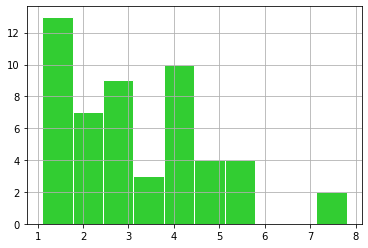

In [32]:
# color – цвет заливки, edgecolor – цвет границ столбцов

df["diffc"].hist(color = "limegreen", edgecolor = "white");

Выберем самые сложности новости – посмотрим, к каким рубрикам они относятся:

In [34]:
df[df["diffc"] > 5]

,title,author,date,diffc,rubrics,text
12,Аномальный эффект Холла обнаружили в трехслойн...,Егор Конюхов,2025-01-28,5.3,Физика,"Физики предположили, что ферромагнетизм в обра..."
16,Физики создали квантовые состояния кота Шрёдин...,Дмитрий Рудик,2025-01-27,7.8,Физика,Это удалось сделать при помощи атомов сурьмы н...
17,Хлорид-анион пролез через слой графена с дефек...,Михаил Бойм,2025-01-27,5.1,Химия,А потом застрял между двумя слоями Химики из Г...
41,Детский стресс повлиял на метилирование ДНК в ...,Юлия Нестерова,2025-01-13,5.7,"Медицина, Биология","Он привел к нарушению регуляции генов, связанн..."
45,В ушах и носу млекопитающих нашли новую скелет...,Юлия Нестерова,2025-01-17,5.5,"Биология, Медицина, Наука",Он сочетает в себе признаки жировой и хрящевой...
48,Хлорид-анион пролез через слой графена с дефек...,Михаил Бойм,2025-01-27,5.1,Химия,А потом застрял между двумя слоями Химики из Г...
49,Физики создали квантовые состояния кота Шрёдин...,Дмитрий Рудик,2025-01-27,7.8,Физика,Это удалось сделать при помощи атомов сурьмы н...
50,Аномальный эффект Холла обнаружили в трехслойн...,Егор Конюхов,2025-01-28,5.3,Физика,"Физики предположили, что ферромагнетизм в обра..."


Как можно заметить, в датафрейме есть дубликаты строк (одинаковые новости), некоторые ссылки попались в исходном коде страницы дважды. Можем избавиться от них с помощью метода `.drop_duplicates()`:

In [35]:
df = df.drop_duplicates()
df.info() # уже меньше строк

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 46
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    47 non-null     object 
 1   author   47 non-null     object 
 2   date     47 non-null     object 
 3   diffc    47 non-null     float64
 4   rubrics  47 non-null     object 
 5   text     47 non-null     object 
dtypes: float64(1), object(5)
memory usage: 2.6+ KB


**Сюжет 2. Авторы новостей.** Раз вспомнили про гистограмму, вспомним и про столбиковую диаграмму. Построим таблицу частот для авторов новостей:

In [36]:
# автор и количество его статей

df["author"].value_counts()

Михаил Подрезов     13
Олег Лищук          12
Сергей Коленов       4
Андрей Фокин         4
Катерина Петрова     4
Егор Конюхов         3
Юлия Нестерова       3
Дмитрий Рудик        2
Михаил Бойм          1
Сергей Ястребов      1
Name: author, dtype: int64

Допишем метод `.plot.bar()` к полученной таблице и построим график:

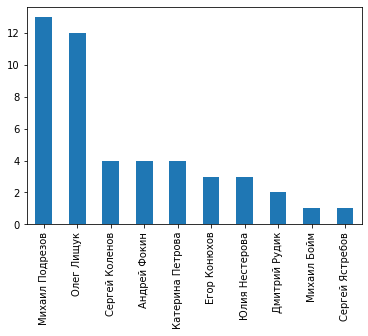

In [37]:
df["author"].value_counts().plot.bar();

Вот тут цвета уже можно добавить для каждого столбца отдельно:

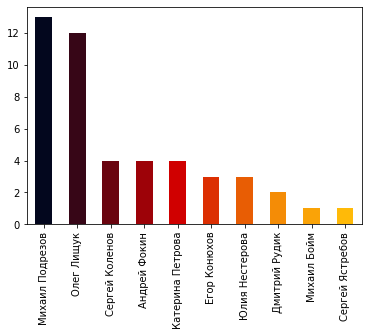

In [39]:
# коды цветов из готовых палитр
#https://coolors.co/palettes/popular/10%20colors

my_col = ["#03071e", "#370617", "#6A040F", "#9D0208", "#D00000", 
          "#DC2F02", "#E85D04", "#F48C06", "#FAA307", "#FFBA08"]

df["author"].value_counts().plot.bar(color = my_col);

**Сюжет 3. Выбор новостей по рубрикам.** Если мы хотим выбрать новости, которые относятся к какой-то рубрике и только к ней, проблем не возникает:

In [40]:
df[df["rubrics"] == "Медицина"]

,title,author,date,diffc,rubrics,text
18,Терапевтическая вакцина помогла при предраковы...,Олег Лищук,2025-01-27,2.4,Медицина,Во второй фазе испытаний Аннеке Эркенс (Anneke...
21,Риск долгого ковида у женщин оказался повышен ...,Олег Лищук,2025-01-27,1.2,Медицина,Исследование проводили в США Димпи Шах (Dimpy ...
25,Расстройство пищевого поведения у японки приве...,Олег Лищук,2025-01-24,3.1,Медицина,Ей помогла когнитивно-поведенческая психотерап...
28,Хирургическое лечение обструктивного апноэ сна...,Олег Лищук,2025-01-23,1.4,Медицина,Статистику собирали в США Эллиотт Сина (Elliot...
34,Экспериментальный препарат сураксавир ускорил ...,Олег Лищук,2025-01-23,2.6,Медицина,Но не у женщин Китайские исследователи провели...
38,Опубликован детальный анализ второй пересадки ...,Олег Лищук,2025-01-09,4.1,Медицина,Пациент прожил с ним около шести недель Америк...
43,CAR-NK-терапия из донорских стволовых клеток у...,Олег Лищук,2025-01-16,4.2,Медицина,Ее токсичность при В-клеточной лимфоме была ни...


Проблемы возникают тогда, когда новость относится к разным рубрикам, потому что тут уже нужно проверять вхождение нужного слова в строку. Для этого пригодится метод `.contains()`, который скрыт внутри набора методов `str` для строк, он проверяет вхождение подстроки в строку и возвращает `True` или `False` как обычное условие: 

In [41]:
df[df["rubrics"].str.contains("Медицина")]

,title,author,date,diffc,rubrics,text
5,Агрессивное лечение гипертензии снизило риск к...,Олег Лищук,2025-01-29,1.2,"Медицина, Психология",По данным клинических испытаний Дэвид Ребуссен...
10,Посчитаны риски 175 возможных последствий для ...,Юлия Нестерова,2025-01-28,4.1,"Медицина, Биология",В исследовании участвовали два миллиона пациен...
18,Терапевтическая вакцина помогла при предраковы...,Олег Лищук,2025-01-27,2.4,Медицина,Во второй фазе испытаний Аннеке Эркенс (Anneke...
20,Вакцины и антибиотики с противовоспалительными...,Олег Лищук,2025-01-27,1.2,"Медицина, Психология","А сахароснижающие, антипсихотики и пищевые доб..."
21,Риск долгого ковида у женщин оказался повышен ...,Олег Лищук,2025-01-27,1.2,Медицина,Исследование проводили в США Димпи Шах (Dimpy ...
25,Расстройство пищевого поведения у японки приве...,Олег Лищук,2025-01-24,3.1,Медицина,Ей помогла когнитивно-поведенческая психотерап...
26,У взрослых с СДВГ оказалась меньше продолжител...,Олег Лищук,2025-01-24,1.3,"Психология, Социология, Медицина",Исследование проводили в Великобритании Джош С...
27,FDA разрешило монотерапию устойчивой депрессии...,Олег Лищук,2025-01-24,1.9,"Медицина, Психология",Он стал первым методом монотерапии этого забол...
28,Хирургическое лечение обструктивного апноэ сна...,Олег Лищук,2025-01-23,1.4,Медицина,Статистику собирали в США Эллиотт Сина (Elliot...
34,Экспериментальный препарат сураксавир ускорил ...,Олег Лищук,2025-01-23,2.6,Медицина,Но не у женщин Китайские исследователи провели...


К слову, если рубрик несколько и мы ищем их по отдельности, будет полезен метод `.isin()`, он проверяет, входит ли значение в ячейке в список, который мы подали на вход:

In [42]:
df[df["rubrics"].isin(["Зоология", "Физика"])]

,title,author,date,diffc,rubrics,text
1,Расставание с партнерами снизило успех размнож...,Сергей Коленов,2025-01-29,3.4,Зоология,Смена партнера выгодна в долгосрочной перспект...
6,Плюшеголовые сойки не сумели воспользоваться и...,Катерина Петрова,2025-01-29,2.5,Зоология,Хотя с решением неинструментальной задачи проб...
12,Аномальный эффект Холла обнаружили в трехслойн...,Егор Конюхов,2025-01-28,5.3,Физика,"Физики предположили, что ферромагнетизм в обра..."
13,Альфа-самцы павианов потратили много энергии н...,Катерина Петрова,2025-01-27,2.3,Зоология,Это было связано со спариванием Биологи из Кен...
16,Физики создали квантовые состояния кота Шрёдин...,Дмитрий Рудик,2025-01-27,7.8,Физика,Это удалось сделать при помощи атомов сурьмы н...
19,Физик сравнил разгадывание кроссворда с перкол...,Егор Конюхов,2025-01-27,2.9,Физика,Разработанная модель не проявила универсальных...
31,Дикие павианы не прошли зеркальный тест. Однак...,Катерина Петрова,2025-01-23,1.8,Зоология,"Однако они, вероятно, частично поняли отражате..."
37,Шимпанзе из зоопарка оказались активнее диких ...,Катерина Петрова,2025-01-22,1.5,Зоология,Ученые засекли и сравнили ночную активность ши...
40,Детектор CONUS+ увидел упругое когерентное рас...,Дмитрий Рудик,2025-01-13,4.3,Физика,"Значимость обнаружения составила 3,7 стандартн..."
46,Анализ генома подтвердил родство сумчатых крот...,Сергей Коленов,2025-01-20,4.3,Зоология,"Кроме того, зоологи выяснили, какие гены ответ..."


**Сюжет 4. Разделение рубрик на несколько столбцов.** Если нам для каких-то целей будет удобнее распределить рубрики по разным столбцам (одна рубрика – один столбец), можно воспользоваться методом `.split()`, который тоже хранится внутри набора `str`:

In [43]:
df["rubrics"].str.split(", ")

0               [Антропология, Археология]
1                               [Зоология]
2                             [Археология]
3               [Археология, Антропология]
4                         [Роботы и дроны]
5                   [Медицина, Психология]
6                               [Зоология]
7                         [Роботы и дроны]
8                     [Физика, Астрономия]
9                             [Археология]
10                    [Медицина, Биология]
11    [Зоология, Антропология, Археология]
12                                [Физика]
13                              [Зоология]
14              [Антропология, Археология]
15                        [Роботы и дроны]
16                                [Физика]
17                                 [Химия]
18                              [Медицина]
19                                [Физика]
20                  [Медицина, Психология]
21                              [Медицина]
22           [Зоология, Экология и климат]
23         

По умолчанию метод `.split()` в `pandas`, как и в стандартном Python, возвращает список со строками, причём проделывает это для всех ячеек. Это не всегда удобно, при выгрузке в файл это все превратится в строки со скобками и запятыми. Добавим аргумент `expand`, который «растянет» содержимое список на столбцы:

In [44]:
df_rubs = df["rubrics"].str.split(", ", expand = True)
df_rubs

,0,1,2
0,Антропология,Археология,None
1,Зоология,None,None
2,Археология,None,None
3,Археология,Антропология,None
4,Роботы и дроны,None,None
5,Медицина,Психология,None
6,Зоология,None,None
7,Роботы и дроны,None,None
8,Физика,Астрономия,None
9,Археология,None,None


Максимальное число рубрик здесь пять, у новостей, которые относятся к меньшему числу рубрик стоят пустые значения (здесь `None` и `nan` равнозначны). Присвоим столбцам названия:

In [45]:
df_rubs.columns = ["rubric01", "rubric02", "rubric03"]

Объединим наш старый датафрейм `df` с `df_rubs` по столбцам (`axis = 1`, то есть приклеиваем данные из `df_rubs` справа, а не снизу в виде новых строк):

In [47]:
final = pd.concat([df, df_rubs], axis = 1)
#final

In [48]:
final.to_excel("nplus1_upd.xlsx")